In [1]:
# Load the modules
from info.models.others import Lorenz_model
from info.models.logistic_network import Logistic
from info.core.info import info, computeCMIKNN, computeMIKNN
from info.utils.sst import independence
from info.utils.others import reorganize_data
from info.utils.causal_network import causal_network
from info.utils.create_graph import create_ts_graph
# from utils import load_cit_data3

# import seaborn as sns
import numpy
import pickle

The CUDA-KNN is not installed!.


### Plotting settings

In [2]:
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colorbar import Colorbar
from matplotlib import rc
%matplotlib inline
rc('text', usetex=True)
small_size = 15
medium_size = 25
bigger_size = 30

# plt.rc('text', usetex=True)              # usage of tex
plt.rc('font', size=small_size)          # controls default text sizes
plt.rc('axes', titlesize=small_size)    # fontsize of the axes title
plt.rc('axes', labelsize=small_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=small_size)    # legend fontsize
plt.rc('figure', titlesize=small_size)  # fontsize of the figure title

### Parameters

In [3]:
# Load the results
fig_folder = "./"
filename = 'info_Lorenz.npy'

### Load the information-theoretic values

In [9]:
data = numpy.load(filename)[()]
cit, pit, tit = data['info'][:,:,0], data['info'][:,:,1], data['info'][:,:,2]
citpid, pitpid = data['pid'][:,:,:4], data['pid'][:,:,4:8]
nvar, nrange = cit.shape
ranges = range(1,nrange+1)
varnames = ['X','Y','Z']

### Plot the information from immediate ($\mathcal{J}$) and distant ($\mathcal{D}$) causal histories

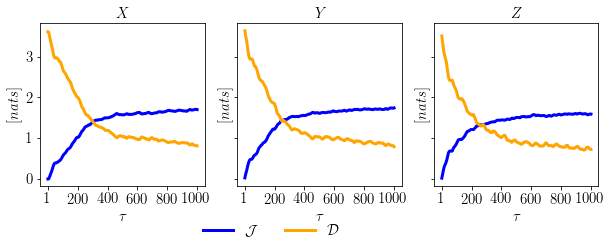

In [15]:
colors=['k','b','r']
# Plot
fig, axes = plt.subplots(1,nvar, figsize=(10,3), sharey=True)
for i in range(nvar):
    ax = axes[i]
    ax.plot(ranges, cit[i,:], color='b', linewidth=3., label=r'$\mathcal{J}$')
    ax.plot(ranges, pit[i,:], color='orange', linewidth=3., label=r'$\mathcal{D}$')
    ax.set_title(r'$' + varnames[i] + '$')
    ax.set_xlabel(r'$\tau$')
    ax.set_ylabel('$[nats]$')
    ax.set_xticks([1,200,400,600,800,1000])
# ax.set_ylim([0,4.])

axes[1].legend(ncol=2, bbox_to_anchor=(.7, -0.15), frameon=False)

### Plot the partial information decomposition of the total causal history with respect to the self- and cross-dependencies

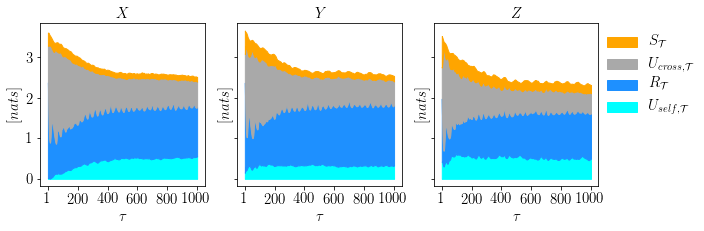

In [27]:
pidlabelst = ['$S_{\mathcal{T}}$', '$R_{\mathcal{T}}$', '$U_{self,\mathcal{T}}$', '$U_{cross,\mathcal{T}}$']

colors = ['orange', 'dodgerblue', 'cyan', 'darkgrey']
colors1 = ['yellow', 'lawngreen', 'violet', 'lightgrey']

# Total
fig, axes = plt.subplots(1,3, figsize=(10,3), sharey=True)
for i in range(nvar):
    ax = axes[i]
    base = numpy.zeros(len(ranges))
    for j in [2,1,3,0]:
        ax.fill_between(ranges, base, base+pitpid[i,:,j]+citpid[i,:,j],
                            color=colors[j], label=pidlabelst[j])
        base += pitpid[i,:,j]+citpid[i,:,j]
    ax.set_title(r'$' + varnames[i] + '$')
    ax.set_xticks([1,200,400,600,800,1000])
    ax.set_xlabel(r'$\tau$')
    ax.set_ylabel(r'$[nats]$')
    handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], ncol=1, bbox_to_anchor=(1.65, 1.), fontsize=15,frameon=False)

### Plot the partial information decomposition of the immediate and distant causal histories with respect to the self- and cross-dependencies

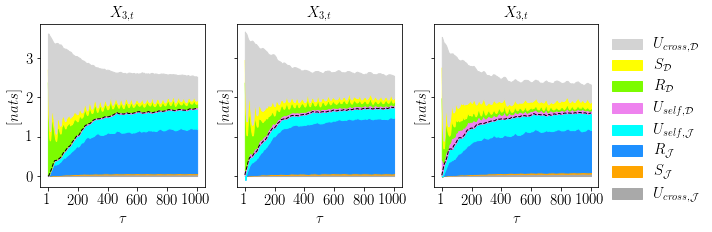

In [26]:
pidlabelsi = ['$S_{\mathcal{J}}$', '$R_{\mathcal{J}}$', '$U_{self,\mathcal{J}}$', '$U_{cross,\mathcal{J}}$']
pidlabelsd = ['$S_{\mathcal{D}}$', '$R_{\mathcal{D}}$', '$U_{self,\mathcal{D}}$', '$U_{cross,\mathcal{D}}$']

fig, axes = plt.subplots(1,3, figsize=(10,3), sharey=True)
for i in range(nvar):
    ax = axes[i]
    base = numpy.zeros(len(ranges))
    for j in [3,0,1,2]:
        ax.fill_between(ranges, base, base+citpid[i,:,j],
                            color=colors[j], label=pidlabelsi[j])
        base += citpid[i,:,j]
    ax.plot(ranges, base, 'k--', linewidth=1)
    for j in [2,1,0,3]:
        ax.fill_between(ranges, base, base+pitpid[i,:,j],
                            color=colors1[j], label=pidlabelsd[j])
        base += pitpid[i,:,j]
    ax.set_title(r'$X_{3,t}$')
    ax.set_xticks([1,200,400,600,800,1000])
    ax.set_xlabel(r'$\tau$')
    ax.set_ylabel(r'$[nats]$')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], ncol=1, bbox_to_anchor=(1., 1.), fontsize=15,frameon=False)
# fig.savefig(fig_folder+'Lorenz_CHA_plot.eps', transparent=True, 
#             format='eps', bbox_inches='tight')